In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

Data Insights 

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.


In [43]:
#Set some global plot defaults
sns.set(rc={"figure.figsize": (18, 6), 'legend.fontsize': 18}) # figsize and leg fontsize of seaborn plots
plt.rc('axes' , labelsize=18)                                  # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)                                  # fontsize of the tick labels
plt.rc('ytick', labelsize=18)                                  # fontsize of the tick labels
plt.rc('axes' , titlesize=18)                                  # fontsize of the plot title

In [44]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [46]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [47]:
df.set_index('login_time', inplace=True)

In [48]:
df['count'] = 1

In [49]:
df_15 = df.resample('15T').sum()
df_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [50]:
df_15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


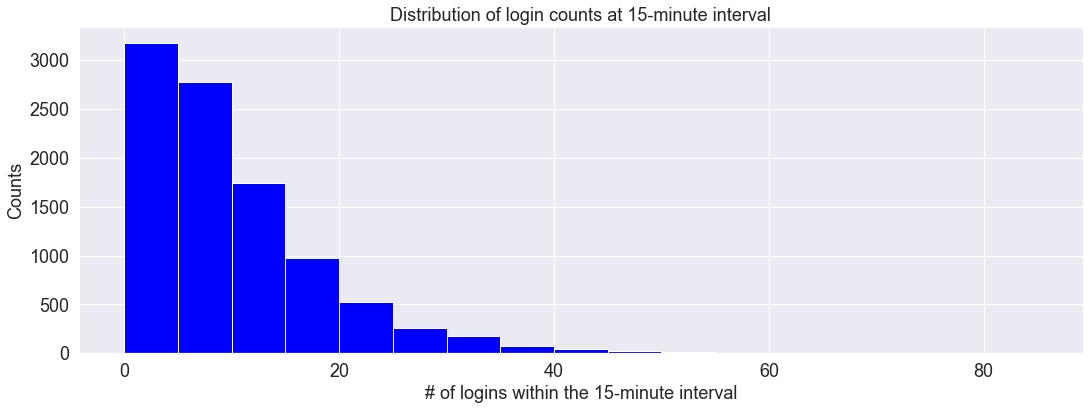

In [51]:
# understand the basic distribution of login counts at 15-minute intervals
df_15['count'].plot(kind='hist',bins=np.arange(0,90,5),color='blue',title="Distribution of login counts at 15-minute interval");
plt.xlabel("# of logins within the 15-minute interval");
plt.ylabel("Counts");

For most of the 15-minute intervals, the login counts concentrate in the range of 0-20. But there are some intervals when login counts are as high as more than 80.  

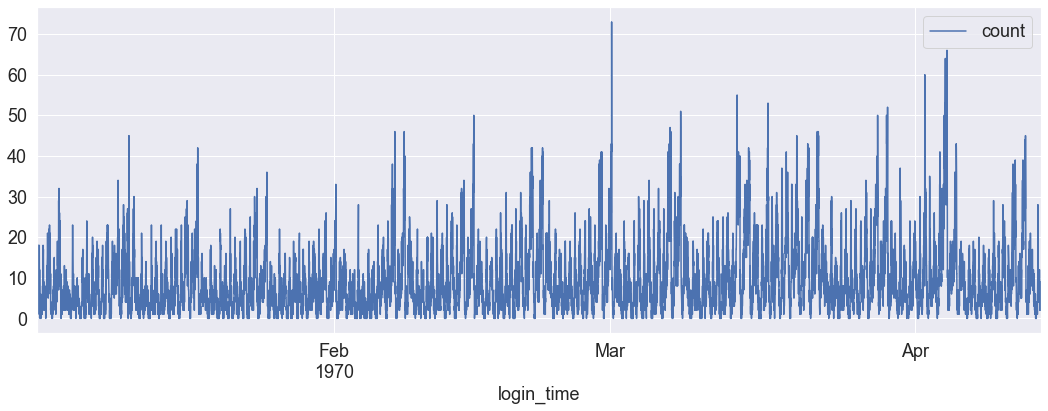

In [52]:
df_15.plot()
plt.show()

Since we are interested in daily cycles. We would like to see daily patterns of the data.

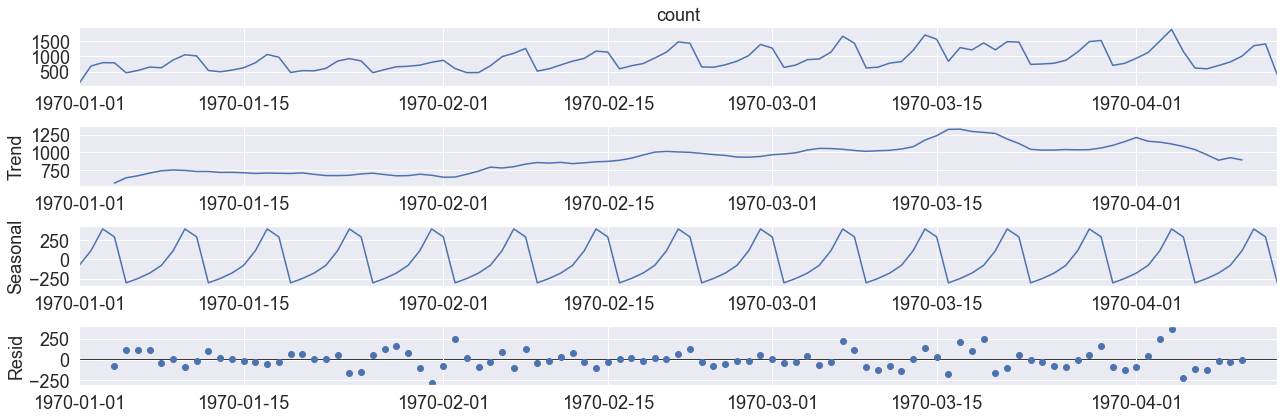

In [53]:
decomposition = seasonal_decompose(df_15['count'].resample('24H').sum())
decomposition.plot()
plt.show()

As illustrated above, the daily pattern (seasonal) is quite obvious. There is also a clear upwards trend. Next we are going to zoom the graph for each month.  

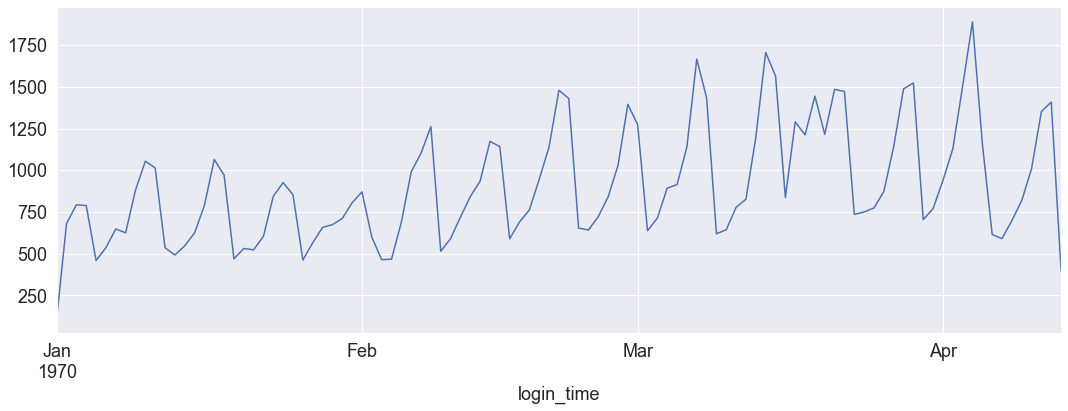

In [54]:
#daily plot
df_15['count'].resample('24H').sum().plot()
plt.show()

In [55]:
df_15.reset_index(inplace=True)
df_15.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [56]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  9788 non-null   datetime64[ns]
 1   count       9788 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.1 KB


In [57]:
df_15['Day'] = df_15['login_time'].dt.day
df_15['Month'] = df_15['login_time'].dt.month
#df['Year'] = df['login_time'].dt.year
df_15['Weekday'] = df_15['login_time'].dt.day_name()
#df['Day_Month'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df_15['Dayofweek'] = df_15['login_time'].dt.dayofweek
df_15['Hour'] = df_15['login_time'].dt.hour
df_15['Time'] = df_15['login_time'].dt.time
df_15.head()

,login_time,count,Day,Month,Weekday,Dayofweek,Hour,Time
0,1970-01-01 20:00:00,2,1,1,Thursday,3,20,20:00:00
1,1970-01-01 20:15:00,6,1,1,Thursday,3,20,20:15:00
2,1970-01-01 20:30:00,9,1,1,Thursday,3,20,20:30:00
3,1970-01-01 20:45:00,7,1,1,Thursday,3,20,20:45:00
4,1970-01-01 21:00:00,1,1,1,Thursday,3,21,21:00:00


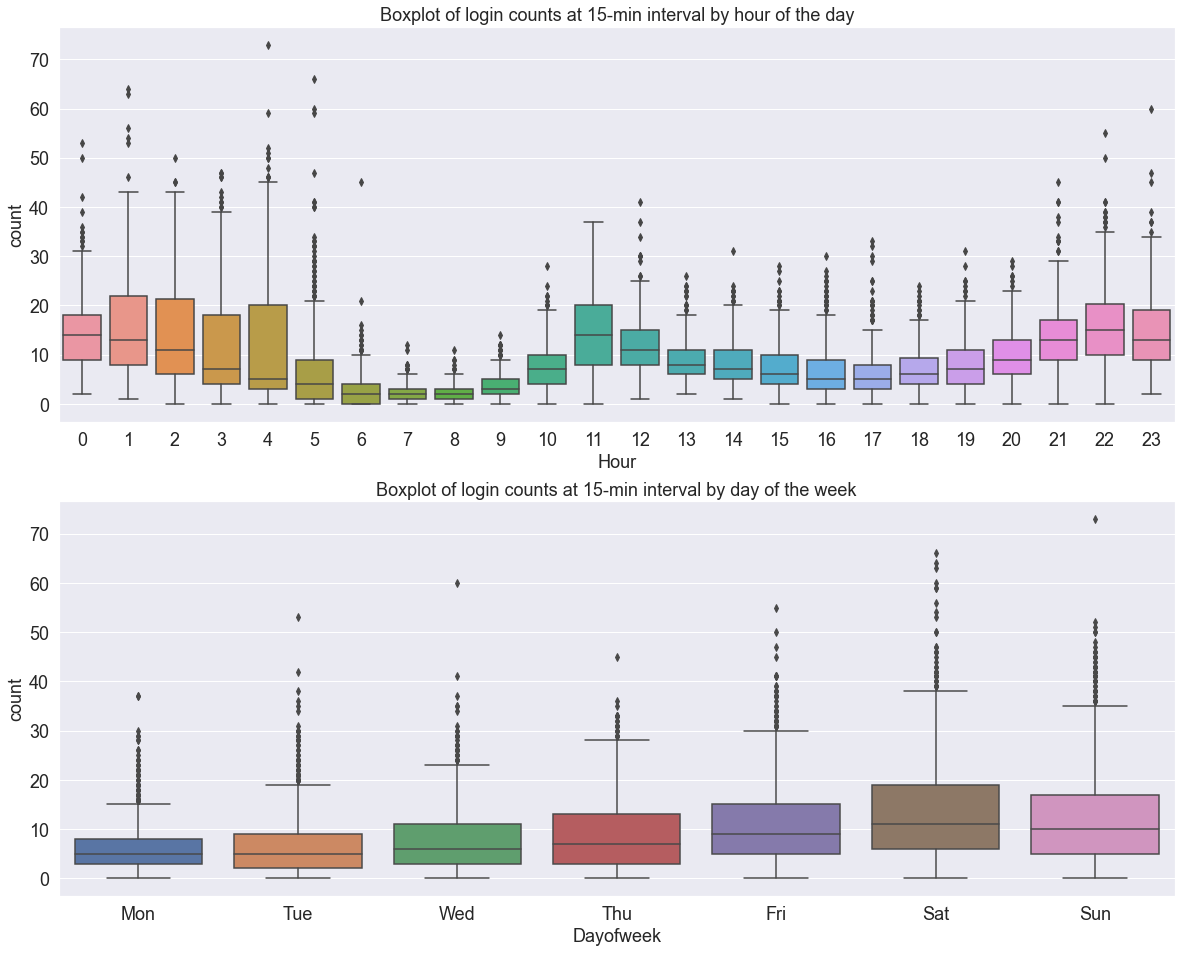

In [58]:
# boxplot showing daily and weekly cycles

plt.figure(figsize=(20,16))
# daily cycles
ax1 = plt.subplot(2,1,1)
sns.boxplot(x='Hour',y='count',data=df_15,ax=ax1);
ax1.set_title('Boxplot of login counts at 15-min interval by hour of the day');
# weekly cycles
ax2 = plt.subplot(2,1,2)
sns.boxplot(x='Dayofweek',y='count',data=df_15,ax=ax2);
ax2.set_title('Boxplot of login counts at 15-min interval by day of the week');
ax2.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

The graphs above illustrate obvious cyclic patterns:
1) daily pattern: the login count at 15-minute intervals starts off the day from its daily lowest in the early morning (6am-9am), goes up to its first spike around 11am, followed by a gradual decline in the afternoon till 5pm; it gradually rises back up in the evening and reaches its second peak in late evening to midnight (10pm-4am). 
2) weekly pattern: the login count at 15-minute intervals sees the lowest on Monday, and gradually climbs up throughout the week, and reaches its peak on weekends. Login counts on Saturday are slightly higher than those on Sunday. 

It is possible that daily pattern differs between weekdays and weekends. Therefore, a 2D heatmap might reveal more insights on the interplay between daily cycles and weekly cycles.

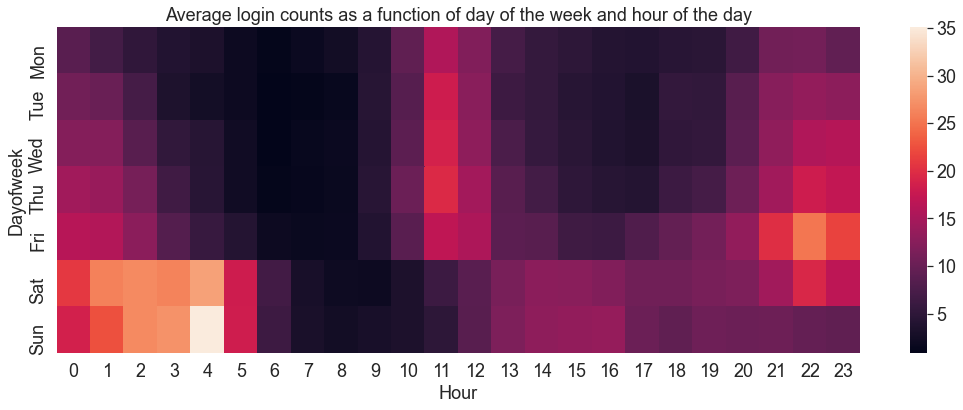

In [59]:
# pivot the 15-minute interval dataframe by 'Dayofweek' as the index and 'Hour' as the column, average the login counts at the values
login_p = pd.pivot_table(df_15, index='Dayofweek',columns='Hour',values='count',aggfunc='mean')
login_p.head(2)

# plot the heatmap
ax = sns.heatmap(login_p);
ax.set_title("Average login counts as a function of day of the week and hour of the day");
ax.set_yticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

From the heatmap we can observe two distinct daily cycles for weekdays $vs.$ weekends:\
  1) weekdays: the login counts peak around 11AM and around 22-23PM, and reaches the lowest in early mornig around 6-8AM, and in the afternoon around 16-17PM. On average, the counts are at the lowest on Monday and highest on Friday during weekdays. On Friday night, there is an obvious spike of login counts for 21-23PM. \
  2) weekends: the login counts reach its peak after midnight around 1am-5am, and drops back in the late morning around 8-10am, whereas the entire afternoon and evening see moderate login activities. On Sunday morning around 4AM, the login counts reaches its peak for the week. 
    
The weekend pattern was shaddowed previously due to the small ratio of weekend days vs weekdays.

#### Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment\
    b. what statistical test(s) you will conduct to verify the significance of the observation\
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.


**Answer:**

#### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

A twoway toll bridge between two neighboring cities discourages Ultimate driver partners in two ways: 
  - Usually a passenger would pay for the toll going from one city to the other, but the driver may need to pay toll back to the original city without a passenger. Therefore drivers tend to be relutant to take such trips between cities.
  - The twoway toll discourages drivers in Gotham to take advantages of active weekday day time in Metropolis, and discourages drivers in Metropolis taking advantages of active weekday night time in Gotham. 

The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

There are many metrics that could be monitored on this experiment, such as: total reimbursement, drivers travel patterns, driver time spent in both cities, etc.. Considering the purpose of toll costs reimbursements is to encourage driver avaiablity in both cities, and thus increase passenger trips with Ultimate and eventually more profits for the company. I would choose **counts of passenger trips** as the metric to measure the success of the experiment. Ideally, if the proposed operation of reimburing toll costs is successful, counts of passenger trips would increase significantly. Otherwise, counts of passenger trips would show no obvious change. 

#### 2.a. how you will implement the experiment
I would implement the experiment as follows:
  1. Inform the drivers well ahead that from day 1 of next month, Ultimate will reimburse  toll cost for non-passenger trips between the cities. Also inform the drivers the patterns that Ultimate see from historical statistics: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
  2. Continue to collect data as before for one month, with one added metric: reimbursements for each driver. 
  3. At the end of month, check on the data to determine: a. the operation of toll reimbursement is successful; or b. the operation is not successful; or c. Ultimate would need more time to run the experiment and observe.

#### 2.b. what statistical test(s) you will conduct to verify the significance of the observation

There are several ways to verify the significance of the observation:\
 **Time Series Analysis:** Conduct a time series analysis to see if there is any obvious change in terms of counts of passenger trips comparing to privious months. The analysis will look at changes after getting rid of seasonailiy and trend. The underlying assumption here is that there is no extreme event happening in the experiment month, such as Olympics in Gotham or a lockdown in Metropolis.\
 **Hypothesis testing:** Group the drivers into two classes: those who got reimbursement and those who did not get reimbursement, comparing their statistics in the experiment month to see if there is any significant difference in terms of counts of passenger trips. Conduct a hypothesis testing with t-test, the p-value will reveal whether or not there is significant differences between the two classes.\
 **Regression:** Run a regression of counts of passenger trips on other variables, to see the impact of the toll reimbursement. Here in this analysis, toll reimbursement would be a numerical variable instead of a categorical variable. It could be actual monetary value or how many times a driver passed the bridge. The underlying assumption is 1. the toll cost is flat for all the time; 2. for drivers who did pass the bridge in this experiment month, they might not pass the bridge everyday; and 3. for drivers who did not pass the bridge, assume the value of this variable is 0.01, to ensure the proper running  of the regression. 

#### 2.c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
Depending on analysis results, I may recommend Ultimate continue toll reimbursement if a significant change of ‘counts of passenger trips’ is witnessed and correlated with toll reimbursement.

Or I may recommend Ultimate stop toll reimbursement if no obvious change on 'counts of passenger trips' is observed.

Or I would recommend Ultimate make appropriate changes accordingly and monitor the operation for a longer time period (e.g. 3 months in total) to decide whether they would like to continue with cost reimbursement and how. 

#### Part 3 - Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).


#### Data description

● city: city this user signed up in\
● phone: primary device for this user\
● signup_date: date of account registration; in the form ‘YYYYMMDD’\
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’\
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup\
● avg_rating_by_driver: the rider’s average rating over all of their trips\
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips\
● surge_pct: the percent of trips taken with surge multiplier > 1\
● avg_surge: The average surge multiplier over all of this user’s trips\
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up\
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise\
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [60]:
df2 = pd.read_json(r'ultimate_data_challenge.json')
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [61]:
df2.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [63]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


#### 3.1 Data cleaning, exploratory analysis and visualizations.

As can be seen above, there are three variables with missing values, which can be filled with specific method:
- avg_raging_of_driver: there are 8,122 missing values, which can be filled with the mean value;
- phone: there are 396 missing values, which can be filled with NA;
- avg_rating_by_driver:there are 201 missing values, which can be filled with the mean value.

In [64]:
# fill in missing values
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].mean())
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].mean())
df2['phone'] = df2['phone'].fillna('NA')

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are two time-relevant variables. Their data type should be set as datetime.

In [66]:
# convert date-related columns to datetime format
df2['last_trip_date'] = pd.to_datetime(df2.last_trip_date, format='%Y-%m-%d')
df2['signup_date'] = pd.to_datetime(df2.signup_date, format='%Y-%m-%d')

In [67]:
# check on categorical column
print("---\n",df2.city.value_counts())#dropna=False
print("---\n",df2.phone.value_counts())
print("---\n",df2.ultimate_black_user.value_counts())

---
 Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64
---
 iPhone     34582
Android    15022
NA           396
Name: phone, dtype: int64
---
 False    31146
True     18854
Name: ultimate_black_user, dtype: int64


In [68]:
# check on datetime columns
print("---\n", df2['last_trip_date'].describe())
print("---\n", df2['signup_date'].describe())

assert len(df2[df2.last_trip_date < df2.signup_date]) == 0

---
 count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object
---
 count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object


As shown, the 'signup_date' was between '2014-01-01 00:00:00' and '2014-01-31 00:00:00'. All users belong to the cohort of January, 2014.

The latest time shown in the 'last_trip_date' column was '2014-07-01 00:00:00'. We assume the data was pulled right after '2014-07-01 00:00:00', six months after the first signup in January, 2014.

#### Calculate the fraction of 'retained' users.

The data was pulled right after '2014-07-01 00:00:00'. Thus a user is considered 'retained' if he/she took a trip within 30 days prior to2014-07-01.

In [69]:
# compute the cutoff time for determing user retention
cutoff = df2.last_trip_date.max() - pd.Timedelta('30 days')
cutoff

Timestamp('2014-06-01 00:00:00')

In [70]:
# determine if a user is retained based on the cutoff time
df2['retained'] = df2.last_trip_date.apply(lambda x: True if x >= cutoff else False)

In [71]:
# compute the fraction of user retained
df2.retained.sum()/len(df2)

0.37608

#### As shown, 37.61% of the users who signed up in January 2014 are retailed six months later.

In [72]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [73]:
# Overview of retained vs. non-retained
retained = df2.groupby('retained')
retained.mean()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
retained,,,,,,,,
False,1.658482,4.606309,1.075339,8.666739,0.299942,60.647032,6.207939,4.787415
True,3.306318,4.593679,1.073809,9.152797,0.505052,61.389034,5.114788,4.762801


<AxesSubplot:>

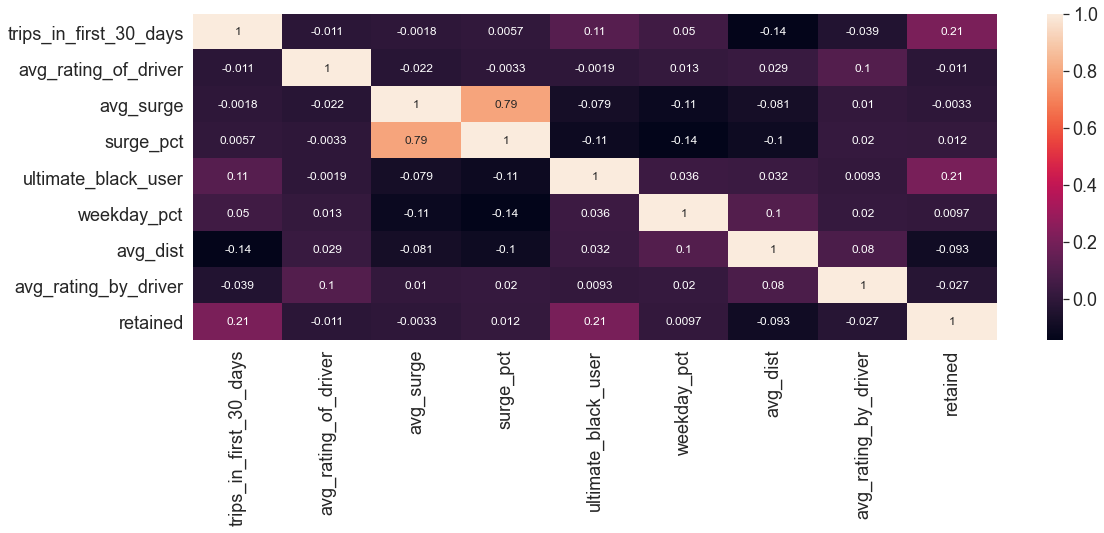

In [74]:
# Correlation of user retention and numerical variables
sns.heatmap(df2.corr(), annot=True)

Among the numerical variables, 'trips_in_first_30_days' and 'ultimate_black_user' are most positively correlated variables, whereas the 'avg_dist' is the most negatively correlated variable.

Other numerical varialbes show only minor correlations, including 'avg_rating_by_driver' and 'avg_rating_of_driver' columns.

city
Astapor           0.255715
King's Landing    0.628134
Winterfell        0.351945
Name: retained, dtype: float64


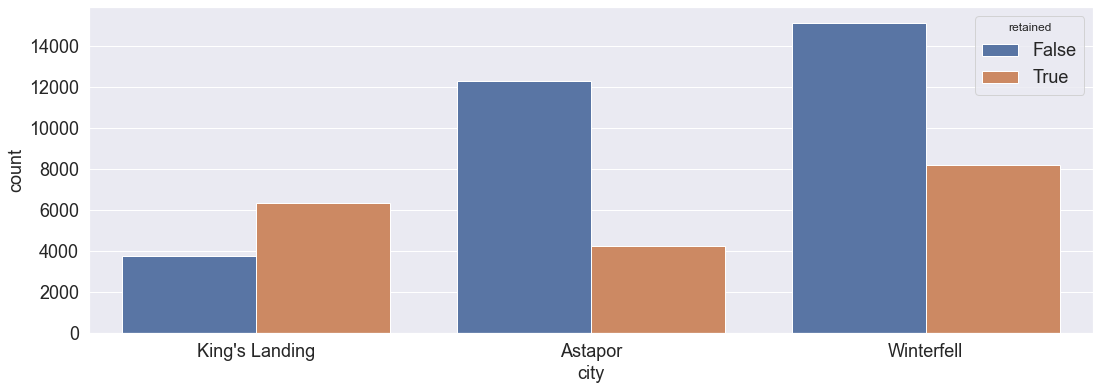

In [75]:
# correlation between 'retained' and 'city'
sns.countplot(x='city', data=df2, hue='retained')
print(df2.groupby(df2.city)['retained'].mean())

User retention is strongly correlated to the city where users signed up in: King's Landing is correlated to the highest retention rate among the three cities, whereas Astapor is the correlated to the lowest user retention.

phone
Android    0.209426
NA         0.335859
iPhone     0.448933
Name: retained, dtype: float64


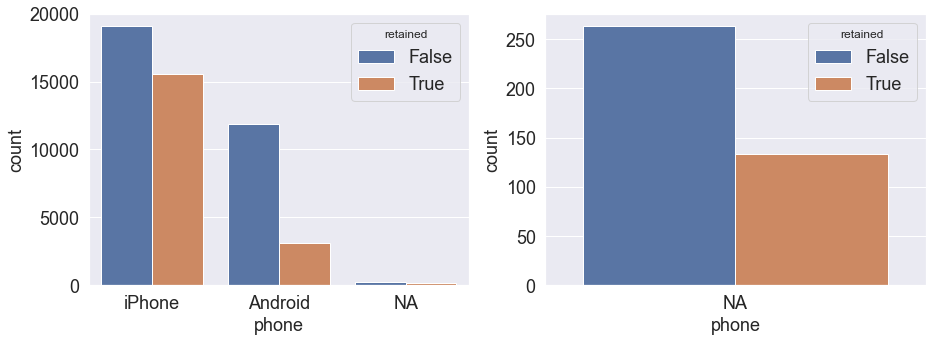

In [76]:
# correlation between 'retained' and 'phone'
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.countplot(x='phone', data=df2, hue='retained',ax=ax1);
ax2 = plt.subplot(1,2,2)
sns.countplot(x='phone', data=df2[df2.phone == 'NA'], hue='retained',ax=ax2);
print(df2.groupby(df2.phone)['retained'].mean())

User retention is strongly correlated to the type of phone used by users: iphone users have a much higher retention rate (44.9%) than Android users (20.9%), whereas for users with no phone informaiton available, the rate is in the middle (33.6%).

signup_date
0    0.387984
1    0.376073
2    0.376645
3    0.360115
4    0.370533
5    0.380453
6    0.384687
Name: retained, dtype: float64


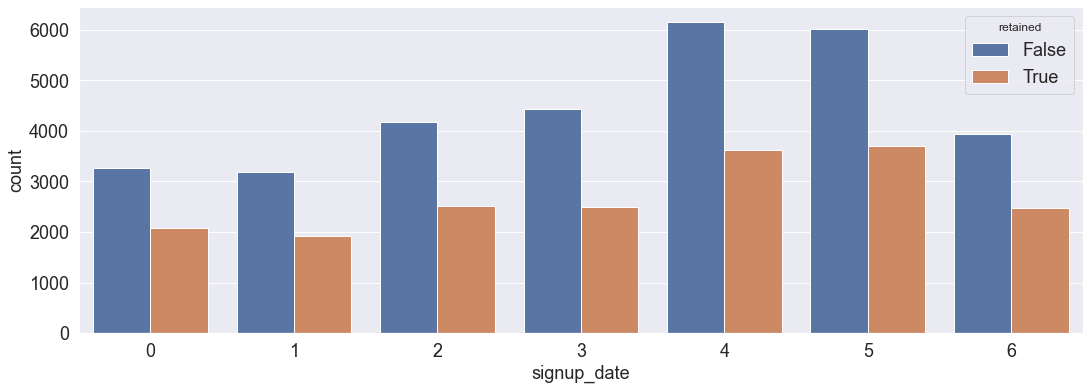

In [77]:
# correlation between 'retained' and 'day of the week' the user signed up
sns.countplot(x=df2.signup_date.dt.dayofweek, data=df2, hue='retained');
print(df2.groupby(df2.signup_date.dt.dayofweek)['retained'].mean())

As shown, signup_date in terms of day of the week does not influence much on user retention rate.

#### 3.2 Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance. 

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  retained                50000 non-null  bool  

To predict user retention, five different classification algorithms are experimented:
  1. Linear Logistic Regression
  2. Non-linear Support Vector Machine
  3. Decision Tree
  4. Random Forest
  5. Gradient Boosting

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score

In [80]:
# set up X and y
X = pd.get_dummies(df2.drop('retained', axis=1), drop_first=True)
X = X.drop(['signup_date', 'last_trip_date'], axis=1)
y = df2.retained

X.head(5)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_NA,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,1,0,0


In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  bool   
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   city_King's Landing     50000 non-null  uint8  
 9   city_Winterfell         50000 non-null  uint8  
 10  phone_NA                50000 non-null  uint8  
 11  phone_iPhone            50000 non-null  uint8  
dtypes: bool(1), float64(6), int64(1), uint8(4)
memory usage: 2.9 MB


In [82]:
y

0         True
1        False
2        False
3         True
4        False
         ...  
49995     True
49996    False
49997    False
49998    False
49999    False
Name: retained, Length: 50000, dtype: bool

In [83]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.25, random_state=42)

In [84]:
# initiate the score table
index = ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier']
score_table = pd.DataFrame(index = index, columns= ['accuracy_train','f1_score_train','accuracy_test','f1_score_test'])

# define function for plotting the results
def compute_log_result(algo, pred_train, pred_test):
    """compute and log the performance for both training and test sets"""
    
    # compute the performance  
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    
    # log the performance
    score_table.loc[algo,:] = accuracy_train, f1_train, accuracy_test, f1_test
    
    # compute confusion matrix and print
    print("Classification results based on the testset:\n", classification_report(y_test, pred_test))

In [85]:

# fit logistic regression model with default parameters

logit = Pipeline([('scaler', StandardScaler()),('logit',LogisticRegression())])
logit.fit(X_train, y_train)
pred_train = logit.predict(X_train)
pred_test = logit.predict(X_test)

# logging of model performance
compute_log_result("LogisticRegression", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.74      0.85      0.79      7799
        True       0.67      0.50      0.57      4701

    accuracy                           0.72     12500
   macro avg       0.70      0.67      0.68     12500
weighted avg       0.71      0.72      0.71     12500



In [86]:
# fit support vector machine model with default parameters

svc = Pipeline([('scaler', StandardScaler()),('svc', SVC())])
svc.fit(X_train, y_train)
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

# logging of model performance
compute_log_result("SVC", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.78      0.87      0.82      7799
        True       0.73      0.59      0.65      4701

    accuracy                           0.76     12500
   macro avg       0.76      0.73      0.74     12500
weighted avg       0.76      0.76      0.76     12500



In [87]:
# Decision Tree Model
dtree = DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

# logging of model performance
compute_log_result("DecisionTreeClassifier", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.82      0.80      0.81      7799
        True       0.67      0.70      0.69      4701

    accuracy                           0.76     12500
   macro avg       0.75      0.75      0.75     12500
weighted avg       0.76      0.76      0.76     12500



In [88]:
# fit random forest model with default parameters

rfc = Pipeline([('scaler', StandardScaler()),('rfc', RandomForestClassifier(class_weight='balanced'))]) # set class_weight='balanced' to adjust for the imbalanced classes
rfc.fit(X_train, y_train)
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

compute_log_result("RandomForestClassifier", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.80      0.82      0.81      7799
        True       0.69      0.66      0.67      4701

    accuracy                           0.76     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.76      0.76      0.76     12500



In [89]:
# fit gradientboosting model with default parameters

gbc = Pipeline([('scaler', StandardScaler()),('gbc', GradientBoostingClassifier())]) # set class_weight='balanced' to adjust for the imbalanced classes
gbc.fit(X_train, y_train)
pred_train = gbc.predict(X_train)
pred_test = gbc.predict(X_test)

compute_log_result("GradientBoostingClassifier", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.81      0.86      0.84      7799
        True       0.74      0.67      0.71      4701

    accuracy                           0.79     12500
   macro avg       0.78      0.77      0.77     12500
weighted avg       0.79      0.79      0.79     12500



In [90]:
print(score_table)

                           accuracy_train f1_score_train accuracy_test  \
LogisticRegression               0.718027       0.570302       0.71656   
SVC                              0.775333       0.668477       0.76472   
DecisionTreeClassifier           0.761573       0.690291       0.76128   
RandomForestClassifier            0.99688       0.995852       0.75976   
GradientBoostingClassifier        0.78896       0.703039       0.78944   

                           f1_score_test  
LogisticRegression              0.568401  
SVC                             0.652487  
DecisionTreeClassifier           0.68949  
RandomForestClassifier           0.67234  
GradientBoostingClassifier      0.705527  


Gradient Boosting Classifier showed the best performance among the five. We will continue with Gradient Boosting.

In [91]:
# Grid search of parameters n_estimators and max_features to improve GradientBoostingClassifer model
parameters = {'gbc__n_estimators': np.arange(500,1000,100), 'gbc__max_features':[None,'sqrt','log2']}
gbc_cv = GridSearchCV(gbc, parameters, scoring='accuracy', cv=5)
gbc_cv.fit(X_train, y_train)
print('Best parameters:', gbc_cv.best_params_)
print('Corresponding accuracy score:', gbc_cv.best_score_)

Best parameters: {'gbc__max_features': 'sqrt', 'gbc__n_estimators': 700}
Corresponding accuracy score: 0.7896


In [92]:

# updated GradientBoostingClassifier model with the optimized parameter
gbc = Pipeline([('scaler', StandardScaler()),('gbc', GradientBoostingClassifier(n_estimators=700, max_features='sqrt'))])
gbc.fit(X_train, y_train)
pred_train = gbc.predict(X_train)
pred_test = gbc.predict(X_test)

compute_log_result("GradientBoostingClassifier", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.81      0.87      0.84      7799
        True       0.75      0.67      0.71      4701

    accuracy                           0.79     12500
   macro avg       0.78      0.77      0.78     12500
weighted avg       0.79      0.79      0.79     12500



In [93]:
# final results
print(score_table.loc['GradientBoostingClassifier'])

# feature importance ranking from the optimized GradientBoostingClassifier 
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': gbc.named_steps.gbc.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))

accuracy_train     0.80432
f1_score_train    0.724446
accuracy_test      0.79376
f1_score_test     0.710467
Name: GradientBoostingClassifier, dtype: object
                   feature  importance
7     avg_rating_by_driver    0.189063
5              weekday_pct    0.169312
8      city_King's Landing    0.155884
3                surge_pct    0.127188
11            phone_iPhone    0.090080
0   trips_in_first_30_days    0.085552
4      ultimate_black_user    0.074138
2                avg_surge    0.038853
6                 avg_dist    0.030424
9          city_Winterfell    0.021212
1     avg_rating_of_driver    0.016906
10                phone_NA    0.001389
